In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from sklearn import metrics
import re
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Miray\\Desktop\\miray_ercan_hw5\\flavors_of_cacao.csv")

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.shape

(1795, 9)

In [5]:
names = df.columns.tolist()
df.columns = names

In [6]:
names

['Company\xa0\n(Maker-if known)',
 'Specific Bean Origin\nor Bar Name',
 'REF',
 'Review\nDate',
 'Cocoa\nPercent',
 'Company\nLocation',
 'Rating',
 'Bean\nType',
 'Broad Bean\nOrigin']

In [7]:
names = df.columns.tolist()
names[names.index('Company\xa0\n(Maker-if known)')] = 'Company'
names[names.index('Specific Bean Origin\nor Bar Name')] = 'Bean_Bar_Name'
names[names.index('Review\nDate')] = 'Review_Date'
names[names.index('Cocoa\nPercent')] = 'Cocoa_Percent'
names[names.index('Company\nLocation')] = 'Company_Location'
names[names.index('Bean\nType')] = 'Bean_Type'
names[names.index('Broad Bean\nOrigin')] = 'Bean_Origin'
df.columns = names

In [8]:
df.drop(["Bean_Type"],axis=1,inplace=True)

In [9]:
df

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,India


In [10]:
df["Cocoa_Percent"]=df["Cocoa_Percent"].replace({'\%':''}, regex = True)

In [11]:
df['Cocoa_Percent'] = pd.to_numeric(df['Cocoa_Percent'],errors='coerce')

In [12]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [13]:
display_all(df.tail())

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.00,Brazil


In [14]:
display_all(df.tail().T)

,1790,1791,1792,1793,1794
Company,Zotter,Zotter,Zotter,Zotter,Zotter
Bean_Bar_Name,Peru,Congo,Kerala State,Kerala State,"Brazil, Mitzi Blue"
REF,647,749,749,781,486
Review_Date,2011,2011,2011,2011,2010
Cocoa_Percent,70,65,65,62,65
Company_Location,Austria,Austria,Austria,Austria,Austria
Rating,3.75,3,3.5,3.25,3
Bean_Origin,Peru,Congo,India,India,Brazil


In [15]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bean_Bar_Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
Review_Date,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
Cocoa_Percent,1795,NaN,NaN,NaN,71.6983,6.32312,42,70,70,75,100
Company_Location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
Bean_Origin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df["Rating"] = np.log(df.Rating)

In [17]:
df["Rating"]

0       1.321756
1       1.011601
2       1.098612
3       1.252763
4       1.252763
          ...   
1790    1.321756
1791    1.098612
1792    1.252763
1793    1.178655
1794    1.098612
Name: Rating, Length: 1795, dtype: float64

In [18]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [19]:
df_compare = df.copy()

In [20]:
a=df.items()

In [21]:
next(a)

('Company',
 0       A. Morin
 1       A. Morin
 2       A. Morin
 3       A. Morin
 4       A. Morin
           ...   
 1790      Zotter
 1791      Zotter
 1792      Zotter
 1793      Zotter
 1794      Zotter
 Name: Company, Length: 1795, dtype: object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   object 
 1   Bean_Bar_Name     1795 non-null   object 
 2   REF               1795 non-null   int64  
 3   Review_Date       1795 non-null   int64  
 4   Cocoa_Percent     1795 non-null   float64
 5   Company_Location  1795 non-null   object 
 6   Rating            1795 non-null   float64
 7   Bean_Origin       1794 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 112.3+ KB


In [23]:
df2=df.copy()

In [24]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [25]:
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)
            

In [26]:
df2

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,1.321756,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,1.011601,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,1.098612,Togo
3,A. Morin,Akata,1680,2015,70.0,France,1.252763,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,1.252763,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,1.321756,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,1.098612,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,1.252763,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,1.178655,India


In [27]:
train_cats(df2)

In [28]:
train_cats(df_compare)

In [29]:
df2.head()

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,1.321756,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,1.011601,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,1.098612,Togo
3,A. Morin,Akata,1680,2015,70.0,France,1.252763,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,1.252763,Peru


In [30]:
df_compare

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,1.321756,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,1.011601,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,1.098612,Togo
3,A. Morin,Akata,1680,2015,70.0,France,1.252763,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,1.252763,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,1.321756,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,1.098612,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,1.252763,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,1.178655,India


In [31]:
df2["Bean_Origin"]

0       Sao Tome
1           Togo
2           Togo
3           Togo
4           Peru
          ...   
1790        Peru
1791       Congo
1792       India
1793       India
1794      Brazil
Name: Bean_Origin, Length: 1795, dtype: category
Categories (100, object): ['Africa, Carribean, C. Am.' < 'Australia' < 'Belize' < 'Bolivia' ... 'Venezuela/ Ghana' < 'Vietnam' < 'West Africa' < ' ']

In [32]:
df2["Bean_Origin"].cat.categories

Index(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia', 'Brazil',
       'Burma', 'Cameroon', 'Carribean', 'Carribean(DR/Jam/Tri)',
       'Central and S. America', 'Colombia', 'Colombia, Ecuador', 'Congo',
       'Cost Rica, Ven', 'Costa Rica', 'Cuba', 'DR, Ecuador, Peru',
       'Dom. Rep., Madagascar', 'Domincan Republic', 'Dominican Rep., Bali',
       'Dominican Republic', 'Ecuador', 'Ecuador, Costa Rica',
       'Ecuador, Mad., PNG', 'El Salvador', 'Fiji', 'Gabon', 'Ghana',
       'Ghana & Madagascar', 'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana', 'Ivory Coast',
       'Jamaica', 'Liberia', 'Mad., Java, PNG', 'Madagascar',
       'Madagascar & Ecuador', 'Malaysia', 'Martinique', 'Mexico', 'Nicaragua',
       'Nigeria', 'PNG, Vanuatu, Mad', 'Panama', 'Papua New Guinea', 'Peru',
       'Pe

In [33]:
df2["Bean_Origin"].cat.codes

0       67
1       77
2       77
3       77
4       55
        ..
1790    55
1791    12
1792    38
1793    38
1794     4
Length: 1795, dtype: int8

# HANDLING MISSING 

In [34]:
df2.isnull()

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1790,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False
1793,False,False,False,False,False,False,False,False


In [35]:
df2.isnull().sum()

Company             0
Bean_Bar_Name       0
REF                 0
Review_Date         0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Origin         1
dtype: int64

In [36]:
display_all(df2.isnull().sum().sort_index()/len(df2))

Bean_Bar_Name       0.000000
Bean_Origin         0.000557
Cocoa_Percent       0.000000
Company             0.000000
Company_Location    0.000000
REF                 0.000000
Rating              0.000000
Review_Date         0.000000
dtype: float64

In [37]:
pd.isnull(df2["Bean_Origin"]).sum()

1

In [38]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [39]:
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes+1

In [40]:
def proc_df(df, y_fld):
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
    res = [df, y]
    

    
    return res

In [41]:
df2

,Company,Bean_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,1.321756,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,1.011601,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,1.098612,Togo
3,A. Morin,Akata,1680,2015,70.0,France,1.252763,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,1.252763,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,1.321756,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,1.098612,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,1.252763,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,1.178655,India


In [42]:
df2, y=proc_df(df2, 'Cocoa_Percent')

In [43]:
df_compare, y_compare = proc_df(df_compare, 'Cocoa_Percent')

In [44]:
df2.columns

Index(['Company', 'Bean_Bar_Name', 'REF', 'Review_Date', 'Company_Location',
       'Rating', 'Bean_Origin', 'REF_na', 'Review_Date_na', 'Rating_na'],
      dtype='object')

In [45]:
y

array([63., 70., 70., ..., 65., 62., 65.])

In [46]:
df2.isnull().sum()

Company             0
Bean_Bar_Name       0
REF                 0
Review_Date         0
Company_Location    0
Rating              0
Bean_Origin         0
REF_na              0
Review_Date_na      0
Rating_na           0
dtype: int64

In [47]:
df2

,Company,Bean_Bar_Name,REF,Review_Date,Company_Location,Rating,Bean_Origin,REF_na,Review_Date_na,Rating_na
0,1,15,1876,2016,19,1.321756,68,False,False,False
1,1,493,1676,2015,19,1.011601,78,False,False,False
2,1,68,1676,2015,19,1.098612,78,False,False,False
3,1,16,1680,2015,19,1.252763,78,False,False,False
4,1,810,1704,2015,19,1.252763,56,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1790,411,755,647,2011,4,1.321756,56,False,False,False
1791,411,259,749,2011,4,1.098612,13,False,False,False
1792,411,484,749,2011,4,1.252763,39,False,False,False
1793,411,484,781,2011,4,1.178655,39,False,False,False


# Decision Tree

In [48]:
df2.isnull().sum()

Company             0
Bean_Bar_Name       0
REF                 0
Review_Date         0
Company_Location    0
Rating              0
Bean_Origin         0
REF_na              0
Review_Date_na      0
Rating_na           0
dtype: int64

In [49]:
df2.isnull().values.any()

False

In [50]:
df2.isnull().sum().sum()

0

In [51]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df2, y)
m.score(df2,y)

0.8626842717465992

In [52]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [53]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

In [54]:
def get_sample(df,n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [55]:
def proc_df(df, y_fld, subset=None):
    
    
    if subset:
        df = get_sample(df, subset)
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
    res = [df, y]
    

    
    return res

In [56]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [57]:
df3=df2.copy()

In [58]:
df3

,Company,Bean_Bar_Name,REF,Review_Date,Company_Location,Rating,Bean_Origin,REF_na,Review_Date_na,Rating_na
0,1,15,1876,2016,19,1.321756,68,False,False,False
1,1,493,1676,2015,19,1.011601,78,False,False,False
2,1,68,1676,2015,19,1.098612,78,False,False,False
3,1,16,1680,2015,19,1.252763,78,False,False,False
4,1,810,1704,2015,19,1.252763,56,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1790,411,755,647,2011,4,1.321756,56,False,False,False
1791,411,259,749,2011,4,1.098612,13,False,False,False
1792,411,484,749,2011,4,1.252763,39,False,False,False
1793,411,484,781,2011,4,1.178655,39,False,False,False


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   int16  
 1   Bean_Bar_Name     1795 non-null   int16  
 2   REF               1795 non-null   int64  
 3   Review_Date       1795 non-null   int64  
 4   Company_Location  1795 non-null   int8   
 5   Rating            1795 non-null   float64
 6   Bean_Origin       1795 non-null   int8   
 7   REF_na            1795 non-null   bool   
 8   Review_Date_na    1795 non-null   bool   
 9   Rating_na         1795 non-null   bool   
dtypes: bool(3), float64(1), int16(2), int64(2), int8(2)
memory usage: 58.0 KB


In [60]:
df3['Rating'] = df3['Rating'].astype(int)

In [61]:
df3['Rating']

0       1
1       1
2       1
3       1
4       1
       ..
1790    1
1791    1
1792    1
1793    1
1794    1
Name: Rating, Length: 1795, dtype: int32

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
import graphviz
import seaborn as sns

In [63]:
train, test = train_test_split(df3, train_size = 0.2, shuffle = True, random_state = 20)
validation, test = train_test_split(test, train_size = 0.7, shuffle = True, random_state = 20)

X_train = train.drop("Rating", axis = 1)
y_train = train['Rating']
X_valid = validation.drop("Rating", axis = 1)
y_valid = validation['Rating']
X_test = test.drop("Rating", axis = 1)
y_test = test['Rating']

In [64]:
X_train.shape

(359, 9)

In [65]:
X_validation.shape

NameError: name 'X_validation' is not defined

In [66]:
X_test

,Company,Bean_Bar_Name,REF,Review_Date,Company_Location,Bean_Origin,REF_na,Review_Date_na,Rating_na
849,191,129,1307,2014,8,4,False,False,False
468,108,938,971,2012,3,76,False,False,False
162,29,137,1784,2016,57,5,False,False,False
1595,368,95,1704,2015,25,16,False,False,False
1105,255,440,1347,2014,24,38,False,False,False
...,...,...,...,...,...,...,...,...,...
1388,329,174,1446,2015,57,91,False,False,False
403,88,261,1530,2015,1,13,False,False,False
1209,289,729,1411,2014,37,55,False,False,False
933,214,538,891,2012,19,21,False,False,False


In [72]:
d_tree= DecisionTreeClassifier(max_depth = 2, random_state=50)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=50)

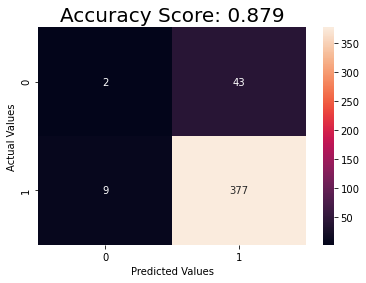

In [73]:
predictions = d_tree.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 20)
plt.show()

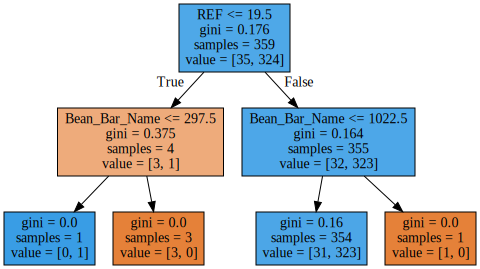

In [74]:
graph = Source(tree.export_graphviz(d_tree, out_file=None,feature_names=X_train.columns, 
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

In [75]:
print(len(train))
print(len(validation))
print(len(test))


359
1005
431


In [76]:
print(print_score(d_tree))

RMSE of train set 0.29385536396391015
RMSE of validation set 0.34554737023254406
R^2 of train set 0.9136490250696379
R^2 of validation set 0.8805970149253731
None
